In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import signal

In [2]:
with open('./h2o.xyz', 'r') as xyz:
    at = []
    rx = []
    ry = []
    rz = []
    for line in xyz:
        if 'Profile' in line:
            pass
            #fr.append(int(line.split('.')[1][:4]))
        elif line.split()[0] == '3':
            pass
        else:
            at.append(line.split()[0])
            rx.append(float(line.split()[1]))
            ry.append(float(line.split()[2]))
            rz.append(float(line.split()[3]))

rx = np.array(rx)
ry = np.array(ry)
rz = np.array(rz)

In [3]:
dt = np.arange(0, 50000.1, 0.1)

In [4]:
dxHO = []
dxOH = []
dxHH = []
dyHO = []
dyOH = []
dyHH = []
dzHO = []
dzOH = []
dzHH = []

#i = 0 H x y z
#i = 1 O x y z
#i = 2 H x y z
#i = 3 H x y z
#i = 4 O x y z
#i = 5 H x y z
#i = 6 H x y z
#i = 7 O x y z
#i = 8 H x y z

for i in range(int(len(rx)/3)):
    dxHO.append(rx[3*i]-rx[3*i+1])
    dyHO.append(ry[3*i]-ry[3*i+1])
    dzHO.append(rz[3*i]-rz[3*i+1])
    
    dxOH.append(rx[3*i+1]-rx[3*i+2])
    dyOH.append(ry[3*i+1]-ry[3*i+2])
    dzOH.append(rz[3*i+1]-rz[3*i+2])

    dxHH.append(rx[3*i]-rx[3*i+2])
    dyHH.append(ry[3*i]-ry[3*i+2])
    dzHH.append(rz[3*i]-rz[3*i+2])

dxHO = np.array(dxHO)
dyHO = np.array(dyHO)
dzHO = np.array(dzHO)

dxOH = np.array(dxOH)
dyOH = np.array(dyOH)
dzOH = np.array(dzOH)

dxHH = np.array(dxHH)
dyHH = np.array(dyHH)
dzHH = np.array(dzHH)

In [5]:
rHO = []
rOH = []
rHH = []

In [6]:
for j in range(len(dxHO)):
    rHOi = np.sqrt((dxHO[j]**2) + (dyHO[j]**2) + (dzHO[j]**2))
    rOHi = np.sqrt((dxOH[j]**2) + (dyOH[j]**2) + (dzOH[j]**2))
    rHHi = np.sqrt((dxHH[j]**2) + (dyHH[j]**2) + (dzHH[j]**2))
    
    rHO.append(rHOi)
    rOH.append(rOHi)
    rHH.append(rHHi)

In [7]:
rHO = np.array(rHO)
rOH = np.array(rOH)
rHH = np.array(rHH)

In [8]:
print(len(np.linspace(0, len(rHO), len(rHO))))
print(len(rHO))
print (rHO.mean(), rOH.mean())

208613
208613
0.946811943454 0.946964406163


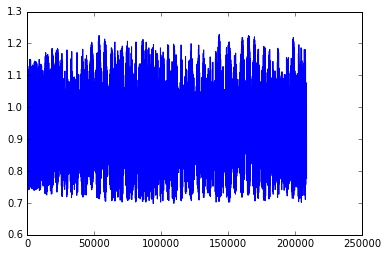

In [9]:
plt.plot(np.linspace(0, len(rHO), len(rHO)), rHO)

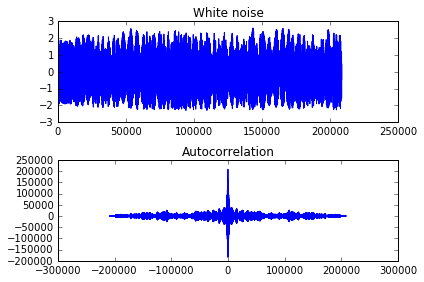

In [77]:
rrr = (rHO-rHO.mean())/np.std(rHO)

autocorr = signal.fftconvolve(rrr, rrr[::-1], mode='full')

fig, (ax_orig, ax_mag) = plt.subplots(2, 1)
ax_orig.plot(rrr)
ax_orig.set_title('White noise')

ax_mag.plot(np.arange(-len(rrr)+1,len(rrr)), autocorr)
ax_mag.set_title('Autocorrelation')
fig.tight_layout()

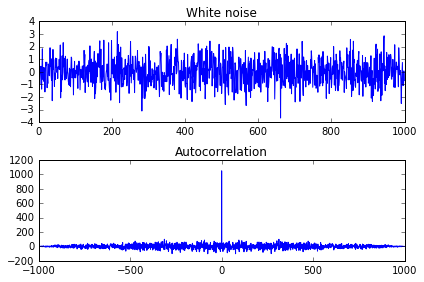

In [70]:
sig1 = 100+np.random.randn(1000)
sig11 = (sig1-sig1.mean())


autocorr = signal.fftconvolve(sig11, sig11[::-1], mode='full')

fig, (ax_orig, ax_mag) = plt.subplots(2, 1)
ax_orig.plot(sig11)
ax_orig.set_title('White noise')

ax_mag.plot(np.arange(-len(sig11)+1,len(sig11)), autocorr)
ax_mag.set_title('Autocorrelation')
fig.tight_layout()

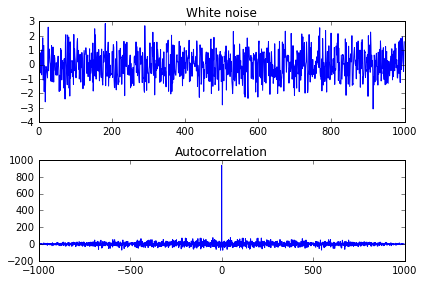

In [43]:
sig = np.random.randn(1000)
autocorr = signal.fftconvolve(sig, sig[::-1], mode='full')

fig, (ax_orig, ax_mag) = plt.subplots(2, 1)
ax_orig.plot(sig)
ax_orig.set_title('White noise')

ax_mag.plot(np.arange(-len(sig)+1,len(sig)), autocorr)
ax_mag.set_title('Autocorrelation')
fig.tight_layout()